In [ ]:
#libraries for data analysis part
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#libraries for ML part
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
kid_df= pd.read_csv('/content/drive/MyDrive/healthcare_analysis/kidney_disease.csv') #import dataset and read it
kid_df.head()#shows only 5 rows

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
kid_df.info()#get all information of data (column name,data type ,missing value,etc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
# Drop the rows with 'ckd\t' in the 'classification' column
kid_df = kid_df[kid_df['classification'] != 'ckd\t']

# Reset the index to ensure it's continuous after dropping rows
kid_df.reset_index(drop=True, inplace=True)

In [ ]:
kid_df['classification'].value_counts()

ckd       248
notckd    150
Name: classification, dtype: int64

In [ ]:
# Replace values in the 'classification' column
kid_df['classification'] = kid_df['classification'].replace({'ckd': 1, 'notckd': 0})


<ipython-input-7-54ae1e4ef98d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kid_df['classification'] = kid_df['classification'].replace({'ckd': 1, 'notckd': 0})


In [ ]:
kid_df['classification'].value_counts()

1    248
0    150
Name: classification, dtype: int64

acknowledged/kidney issue-1
not ack/no kidney issue -0

In [ ]:
kid_df.groupby('classification').mean()

<ipython-input-9-4108f44408e8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kid_df.groupby('classification').mean()


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
classification,,,,,,,,,,,,
0,324.500000,46.516779,71.351351,1.022414,0.000000,0.000000,107.722222,32.798611,0.868966,141.731034,4.337931,15.188194
1,124.427419,54.425000,79.705882,1.013937,1.721154,0.770732,175.523810,72.656170,4.430720,133.882530,4.883030,10.652217


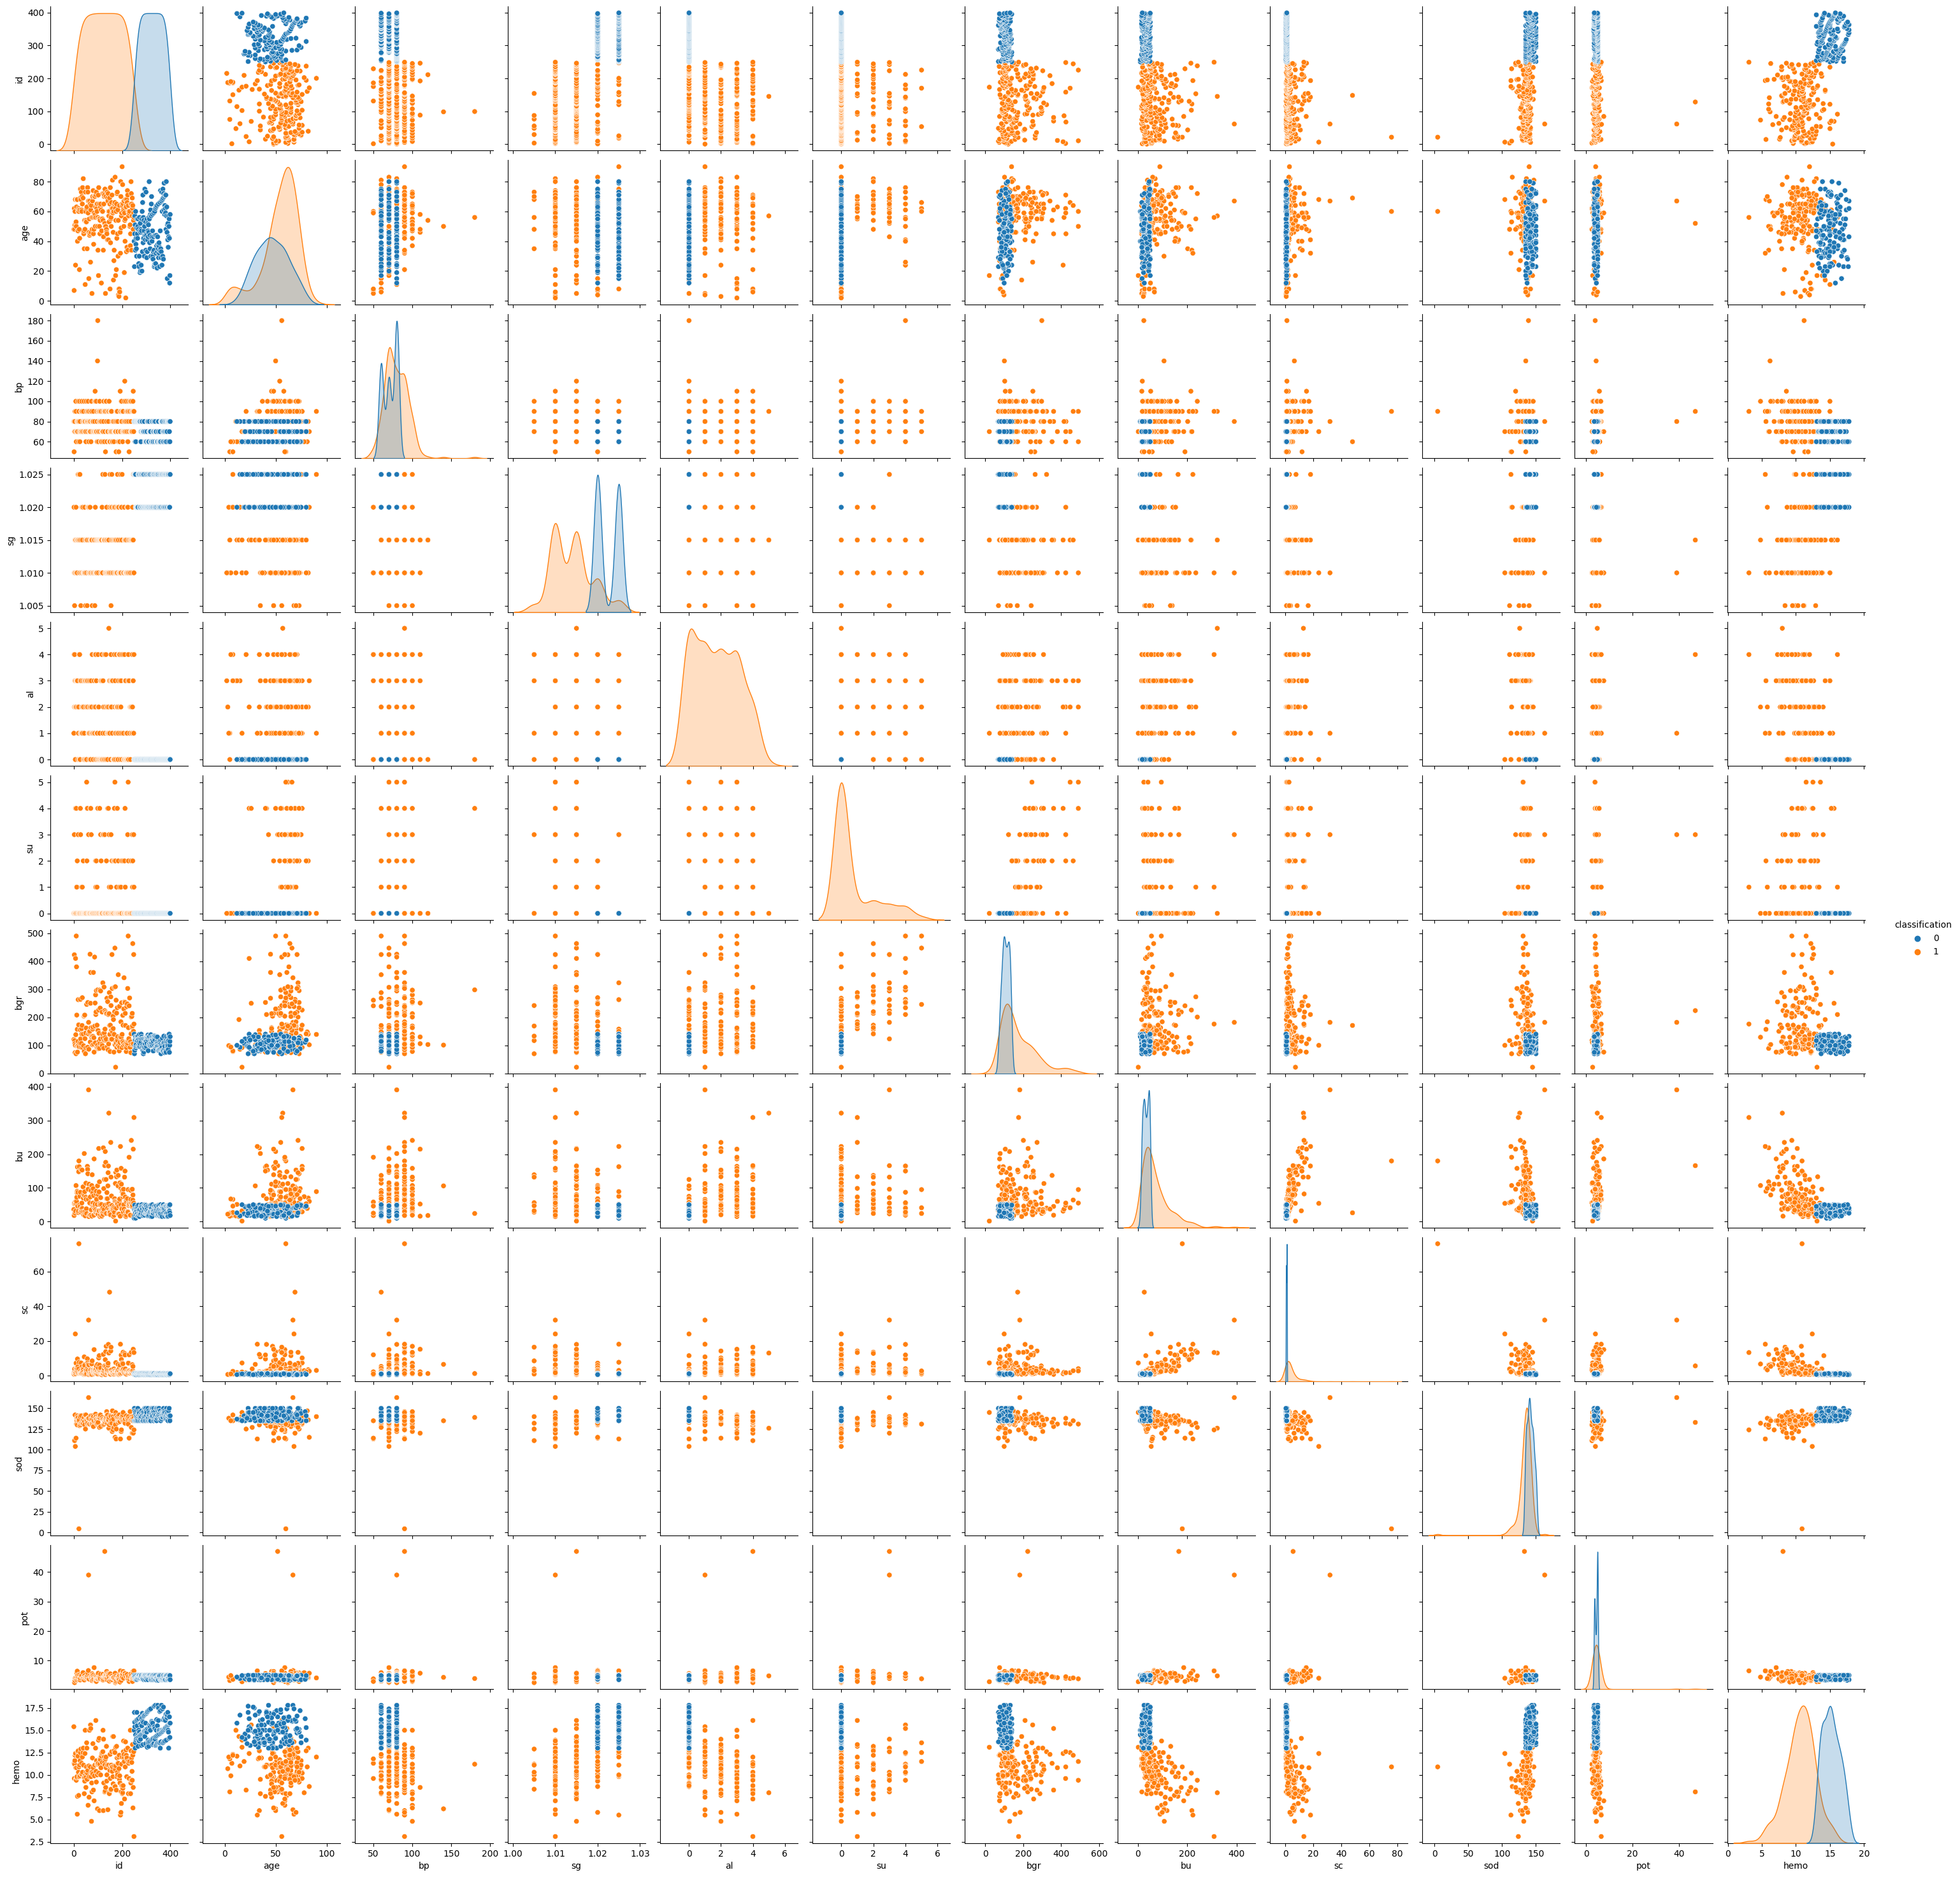

In [ ]:
sns.pairplot(kid_df,hue = "classification")#vizualize the most determined feature that contribute to the outcome wrt target   (sns=sea born library,pairplot=map feature with each other)

In [ ]:
corr = kid_df.corr()#correleation function to show correleation to find best dependecy
corr

<ipython-input-11-df5879d22d1e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = kid_df.corr()#correleation function to show correleation to find best dependecy


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,classification
id,1.000000,-0.182440,-0.245150,0.644490,-0.542865,-0.283262,-0.340769,-0.307176,-0.269050,0.367977,-0.092574,0.639046,-0.839725
age,-0.182440,1.000000,0.161930,-0.188623,0.120541,0.222134,0.245090,0.198870,0.133206,-0.099911,0.058784,-0.190061,0.224211
bp,-0.245150,0.161930,1.000000,-0.224937,0.163725,0.221642,0.162688,0.186365,0.145717,-0.119885,0.074908,-0.306212,0.297060
sg,0.644490,-0.188623,-0.224937,1.000000,-0.468538,-0.298542,-0.373523,-0.318385,-0.363379,0.408659,-0.073657,0.602582,-0.731560
al,-0.542865,0.120541,0.163725,-0.468538,1.000000,0.270442,0.378599,0.455871,0.400025,-0.458257,0.129465,-0.634632,0.626458
su,-0.283262,0.222134,0.221642,-0.298542,0.270442,1.000000,0.719130,0.167841,0.223032,-0.133709,0.219373,-0.224775,0.345483
bgr,-0.340769,0.245090,0.162688,-0.373523,0.378599,0.719130,1.000000,0.144942,0.115414,-0.265954,0.067258,-0.307122,0.419703
bu,-0.307176,0.198870,0.186365,-0.318385,0.455871,0.167841,0.144942,1.000000,0.586408,-0.325723,0.357161,-0.610756,0.382893
sc,-0.269050,0.133206,0.145717,-0.363379,0.400025,0.223032,0.115414,0.586408,1.000000,-0.691585,0.326058,-0.401967,0.300848
sod,0.367977,-0.099911,-0.119885,0.408659,-0.458257,-0.133709,-0.265954,-0.325723,-0.691585,1.000000,0.097713,0.366991,-0.375934


In [ ]:
columns_with_nan = kid_df.columns[kid_df.isna().any()].tolist()
print("Columns with NaN values:", columns_with_nan)


Columns with NaN values: ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [ ]:
kid_df['age'].fillna(kid_df['age'].mean(), inplace=True)

In [ ]:
kid_df['sg'].fillna(kid_df['sg'].mean(), inplace=True)

In [ ]:
kid_df.fillna(kid_df.mean(), inplace=True)


<ipython-input-15-c61e05057dbe>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kid_df.fillna(kid_df.mean(), inplace=True)


In [ ]:
columns_with_nan = kid_df.columns[kid_df.isna().any()].tolist()
print("Columns with NaN values:", columns_with_nan)


Columns with NaN values: ['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [ ]:
kid_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,1
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,1


In [ ]:
kid_df = kid_df.drop(["bp","sc","pot","hemo","id","pcv","wc","rc","rbc","pc","pcc","ba","htn","dm","cad","appet","pe","ane","sod"], axis=1)
kid_df.head()

,age,sg,al,su,bgr,bu,classification
0,48.0,1.020,1.0,0.0,121.000000,36.0,1
1,7.0,1.020,4.0,0.0,147.943503,18.0,1
2,62.0,1.010,2.0,3.0,423.000000,53.0,1
3,48.0,1.005,4.0,0.0,117.000000,56.0,1
4,51.0,1.010,2.0,0.0,106.000000,26.0,1


<Axes: >

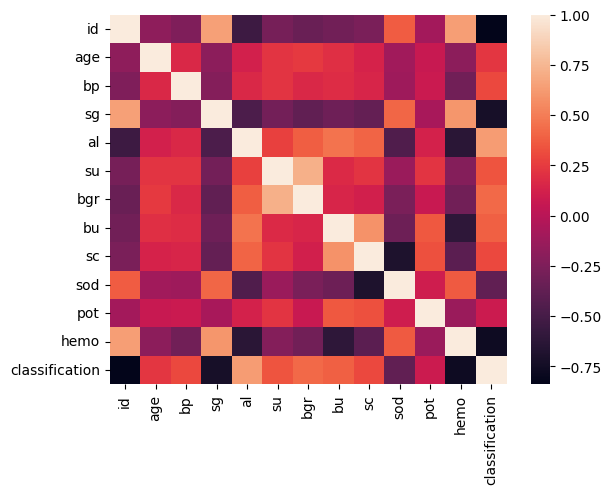

In [ ]:
import seaborn as sns
sns.heatmap(corr,)#to vizualize graphically(lighter shade=best co-relation)

In [ ]:
#separate the data and labels
x= kid_df.drop(columns= 'classification',axis=1)# all features
y= kid_df['classification']#labels
x.head()

,age,sg,al,su,bgr,bu
0,48.0,1.020,1.0,0.0,121.000000,36.0
1,7.0,1.020,4.0,0.0,147.943503,18.0
2,62.0,1.010,2.0,3.0,423.000000,53.0
3,48.0,1.005,4.0,0.0,117.000000,56.0
4,51.0,1.010,2.0,0.0,106.000000,26.0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,stratify=y,random_state=2)#y train=20,y test=80,stratify used to distribute evenly )

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(x_train,y_train)#training the model by giving only train data

SVC(kernel='linear')

In [ ]:
x_train_prediction = classifier.predict(x_train)#test the accuracy of the training data set
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [ ]:
training_data_accuracy

0.89937106918239

In [ ]:
x_train_prediction = classifier.predict(x_test)#test the accuracy of the training data set
training_data_accuracy = accuracy_score(x_train_prediction,y_test)

In [ ]:
training_data_accuracy

0.875

In [ ]:
input_data = (48,1.02,2,1,160,45)

input_data_as_numpy_array = np.asarray(input_data)
print(input_data_as_numpy_array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
print(input_data_reshaped)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    message = 'Nothing to worry, You do not have any kidney disease.'
else:
    message = 'You have kidney disease, Kindly contact a doctor.'

BOLD = "\033[1m"
RESET = "\033[0m"
RED = "\033[91m"
GREEN = "\033[92m"
formatted_input = f"{BOLD}Input Features: {RESET} {input_data}"
formatted_prediction = f"{BOLD}Prediction: {RESET} {RED if prediction == 1 else GREEN}{prediction}{RESET}"
formatted_message = f"{BOLD}Prediction Message: {RESET} {RED if prediction == 1 else GREEN}{message}{RESET}"

print(formatted_input)
print(formatted_prediction)
print(formatted_message)


[ 48.     1.02   2.     1.   160.    45.  ]
[[ 48.     1.02   2.     1.   160.    45.  ]]
[1]
Input Features:  (48, 1.02, 2, 1, 160, 45)
Prediction:  [1]
Prediction Message:  You have kidney disease, Kindly contact a doctor.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
for column in x.columns:
  print(column)

age
sg
al
su
bgr
bu


In [ ]:
import pickle #library for app

In [ ]:
import os

# Define the path for the directory (replace with your desired directory path)
directory_path = '/path/to/health_data_analysis1'  # Example: '/home/user/my_data_directory'

# Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)

# Check if the directory was created or already exists
if os.path.exists(directory_path):
    print(f"Directory '{directory_path}' has been created or already exists.")
else:
    print(f"Failed to create directory '{directory_path}'.")


Directory '/path/to/health_data_analysis1' has been created or already exists.


In [ ]:
filename='kidney_model.sav'#give file name

In [ ]:
pickle.dump(classifier,open(filename,'wb'))#save directory

In [ ]:
loaded_model = pickle.load(open(filename,'rb'))

In [ ]:
input_data = (48,1.02,2,1,160,45)

input_data_as_numpy_array = np.asarray(input_data)
print(input_data_as_numpy_array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
print(input_data_reshaped)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    message = 'Nothing to worry, You do not have any kidney disease.'
else:
    message = 'You have kidney disease, Kindly contact a doctor.'

BOLD = "\033[1m"
RESET = "\033[0m"
RED = "\033[91m"
GREEN = "\033[92m"
formatted_input = f"{BOLD}Input Features: {RESET} {input_data}"
formatted_prediction = f"{BOLD}Prediction: {RESET} {RED if prediction == 1 else GREEN}{prediction}{RESET}"
formatted_message = f"{BOLD}Prediction Message: {RESET} {RED if prediction == 1 else GREEN}{message}{RESET}"

print(formatted_input)
print(formatted_prediction)
print(formatted_message)


[ 48.     1.02   2.     1.   160.    45.  ]
[[ 48.     1.02   2.     1.   160.    45.  ]]
[1]
Input Features:  (48, 1.02, 2, 1, 160, 45)
Prediction:  [1]
Prediction Message:  You have kidney disease, Kindly contact a doctor.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
